In [1]:
import sys
import os
import io
import time
import japanize_matplotlib
import pathlib
import yaml
import importlib

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

from yaml import Loader

In [2]:
root = '/home/atom/github/Dashboard/'
os.chdir(root)
sys.path.append(root)

In [3]:
import generate as g
importlib.reload(g)

<module 'generate' from '/home/atom/github/Dashboard/generate.py'>

In [4]:
%%timeit -n 1 -r 1
match_dict = {match: g.MatchData(match) for match in sorted(os.listdir(os.path.join(root, 'data'))) if not match.startswith('.')}

/home/atom/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


26.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [5]:
match_dict = {match: g.MatchData(match) for match in sorted(os.listdir(os.path.join(root, 'data'))) if not match.startswith('.')}

In [6]:
match_dict

{'11sec_vsWaseda': <generate.MatchData at 0x7fc15c0dae80>,
 '12sec_vsWaseda': <generate.MatchData at 0x7fc19cbdde10>,
 '13sec_vsHosei': <generate.MatchData at 0x7fc19cbddd30>,
 '14sec_vsSenshu': <generate.MatchData at 0x7fc17b9a8e48>,
 '15sec_vsToyo': <generate.MatchData at 0x7fc171abc0f0>,
 '16sec_vsRissho': <generate.MatchData at 0x7fc19d0b1358>,
 '17sec_vsChuo': <generate.MatchData at 0x7fc19d0b1278>,
 '18sec_vsKomazawa': <generate.MatchData at 0x7fc19cbdde48>,
 '19sec_vsRKU': <generate.MatchData at 0x7fc19d865358>,
 '20sec_vsMeiji': <generate.MatchData at 0x7fc19f173128>,
 '21sec_vsToin': <generate.MatchData at 0x7fc19f5a65f8>,
 '22sec_vsJunten': <generate.MatchData at 0x7fc19c7b46d8>,
 '2sec_vsToin': <generate.MatchData at 0x7fc19c7ce390>,
 '3sec_vsToyo': <generate.MatchData at 0x7fc197f5a550>,
 '4sec_vsMeiji': <generate.MatchData at 0x7fc18fff8f98>,
 '5sec_vsJunten': <generate.MatchData at 0x7fc18e205f98>,
 '6sec_vsChuo': <generate.MatchData at 0x7fc18a452470>,
 '7sec_vsRKU': <ge

In [73]:
events = [
        '失点',
        '得点',
        'GK',
        'スローイン',
        'FK',
        'CK',
        'PK',
        'パス',
        'ドリブル',
        '枠外シュート',
        'クロス',
        '枠内シュート',
        '被枠外シュート',
        'クリア',
        'ブロック',
        'インターセプト',
        'シュートブロック',
        'カット',
        '被枠内シュート',
        'ファール',
        'オフサイド',
        'キャッチ',
        'パンチング'
]
    
gps_events = ['走行距離', 'HI距離','最高速度','最高速度','スプリント回数']

event_count_dict = {}
possession_rate_dict = {}
gps_average_dict = {}

In [74]:
def get_gps_stats(match_data, mode='average'):
    gps_dict = match_data.gps_data
    
    gps_events = ['Distance (m)', 'Speed (km/h)','Bodyload','Acceleration (m/s/s)']
    if mode == 'average':
        averages = {e:0 for e in gps_events}
        for player, df in gps_dict.items():
            for key in gps_events:
                try:
                    averages[key] += df[key].mean() / len(gps_dict.keys())
                except:
                    averages[key] += 0
    return averages

In [75]:
from IPython.display import display
import pandas as pd

for match, match_data in match_dict.items():
    event_df = match_data.event_data
    gps_dict = match_data.gps_data
    
    event_count_dict[match] = [match_data.get_count(e) for e in events]
    possession_rate_dict[match] = match_data.possession_time(0, 90*60)
    gps_average_dict[match] = get_gps_stats(match_data)

'PK'
'失点'
'PK'
'パンチング'
'失点'
'得点'
'PK'
'パス'
'オフサイド'
'失点'
'パス'
'パンチング'
'PK'
'パス'
'パンチング'
'失点'
'PK'
'パス'
'PK'
'パス'
'パンチング'
'失点'
'PK'
'パス'
'得点'
'PK'
'パス'
'枠内シュート'
'オフサイド'
'パンチング'
'PK'
'パス'
'パンチング'
'PK'
'パス'
'失点'
'得点'
'PK'
'パス'
'パンチング'
'PK'
'オフサイド'
'パンチング'
'失点'
'得点'
'PK'
'被枠内シュート'
'失点'
'PK'
'オフサイド'
'パンチング'
'失点'
'得点'
'PK'
'被枠内シュート'
'キャッチ'
'パンチング'
'失点'
'PK'
'被枠内シュート'
'オフサイド'


/home/atom/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


'得点'
'PK'


In [88]:
from natsort import natsorted

event_count_df = pd.DataFrame(event_count_dict, index=events, columns=natsorted(list(event_count_dict.keys())))
possession_rate_df = pd.DataFrame(possession_rate_dict, index=['筑波','相手チーム'], columns=natsorted(list(possession_rate_dict.keys())))
gps_df = pd.DataFrame(gps_average_dict, columns=natsorted(list(gps_average_dict.keys())))

for df in [event_count_df, possession_rate_df, gps_df]:
    display(df.head())

,2sec_vsToin,3sec_vsToyo,4sec_vsMeiji,5sec_vsJunten,6sec_vsChuo,7sec_vsRKU,8sec_vsHosei,9sec_vsSenshu,11sec_vsWaseda,12sec_vsWaseda,13sec_vsHosei,14sec_vsSenshu,15sec_vsToyo,16sec_vsRissho,17sec_vsChuo,18sec_vsKomazawa,19sec_vsRKU,20sec_vsMeiji,21sec_vsToin,22sec_vsJunten
失点,2.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,1.0,3.0,2.0,0.0
得点,2.0,0.0,2.0,1.0,0.0,1.0,0.0,3.0,1.0,5.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,0.0
GK,7.0,6.0,21.0,10.0,8.0,4.0,5.0,11.0,9.0,8.0,9.0,10.0,7.0,13.0,11.0,15.0,9.0,9.0,8.0,11.0
スローイン,25.0,16.0,16.0,32.0,27.0,18.0,15.0,20.0,28.0,19.0,28.0,27.0,35.0,28.0,17.0,27.0,30.0,32.0,15.0,30.0
FK,7.0,15.0,14.0,10.0,11.0,5.0,13.0,14.0,12.0,19.0,9.0,10.0,13.0,11.0,15.0,21.0,12.0,18.0,13.0,11.0


,2sec_vsToin,3sec_vsToyo,4sec_vsMeiji,5sec_vsJunten,6sec_vsChuo,7sec_vsRKU,8sec_vsHosei,9sec_vsSenshu,11sec_vsWaseda,12sec_vsWaseda,13sec_vsHosei,14sec_vsSenshu,15sec_vsToyo,16sec_vsRissho,17sec_vsChuo,18sec_vsKomazawa,19sec_vsRKU,20sec_vsMeiji,21sec_vsToin,22sec_vsJunten
筑波,1654,1530,934,1346,1573,1393,1464,951,1797,1247,2171,1204,2037,735,1031,1047,1608,1407,1612,905
相手チーム,1085,1185,1653,1219,815,639,1144,790,634,1288,1897,1022,683,1546,1296,635,918,1086,1145,1644


,2sec_vsToin,3sec_vsToyo,4sec_vsMeiji,5sec_vsJunten,6sec_vsChuo,7sec_vsRKU,8sec_vsHosei,9sec_vsSenshu,11sec_vsWaseda,12sec_vsWaseda,13sec_vsHosei,14sec_vsSenshu,15sec_vsToyo,16sec_vsRissho,17sec_vsChuo,18sec_vsKomazawa,19sec_vsRKU,20sec_vsMeiji,21sec_vsToin,22sec_vsJunten
Acceleration (m/s/s),0.014034,0.012842,0.012842,0.012351,0.012842,0.012161,0.014034,0.014034,0.014034,0,0,0,0,0,0,0,0,0,0,0
Bodyload,127.658536,81.666244,81.666244,65.769106,81.666244,68.892586,127.658536,127.658536,127.658536,0,0,0,0,0,0,0,0,0,0,0
Distance (m),7647.266879,4477.602663,4477.602663,4328.821020,4477.602663,4447.838538,7647.266879,7647.266879,7647.266879,0,0,0,0,0,0,0,0,0,0,0
Speed (km/h),4.644541,4.486895,4.486895,4.316905,4.486895,4.475982,4.644541,4.644541,4.644541,0,0,0,0,0,0,0,0,0,0,0


In [173]:
df = pd.concat([event_count_df, possession_rate_df, gps_df])
print(df.index)
df.head()

Index(['失点', '得点', 'GK', 'スローイン', 'FK', 'CK', 'PK', 'パス', 'ドリブル', '枠外シュート',
       'クロス', '枠内シュート', '被枠外シュート', 'クリア', 'ブロック', 'インターセプト', 'シュートブロック', 'カット',
       '被枠内シュート', 'ファール', 'オフサイド', 'キャッチ', 'パンチング', '筑波', '相手チーム',
       'Acceleration (m/s/s)', 'Bodyload', 'Distance (m)', 'Speed (km/h)'],
      dtype='object')


,2sec_vsToin,3sec_vsToyo,4sec_vsMeiji,5sec_vsJunten,6sec_vsChuo,7sec_vsRKU,8sec_vsHosei,9sec_vsSenshu,11sec_vsWaseda,12sec_vsWaseda,13sec_vsHosei,14sec_vsSenshu,15sec_vsToyo,16sec_vsRissho,17sec_vsChuo,18sec_vsKomazawa,19sec_vsRKU,20sec_vsMeiji,21sec_vsToin,22sec_vsJunten
失点,2.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,1.0,3.0,2.0,0.0
得点,2.0,0.0,2.0,1.0,0.0,1.0,0.0,3.0,1.0,5.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,0.0
GK,7.0,6.0,21.0,10.0,8.0,4.0,5.0,11.0,9.0,8.0,9.0,10.0,7.0,13.0,11.0,15.0,9.0,9.0,8.0,11.0
スローイン,25.0,16.0,16.0,32.0,27.0,18.0,15.0,20.0,28.0,19.0,28.0,27.0,35.0,28.0,17.0,27.0,30.0,32.0,15.0,30.0
FK,7.0,15.0,14.0,10.0,11.0,5.0,13.0,14.0,12.0,19.0,9.0,10.0,13.0,11.0,15.0,21.0,12.0,18.0,13.0,11.0


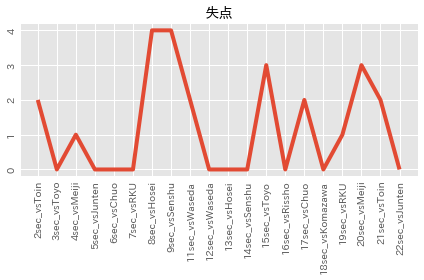

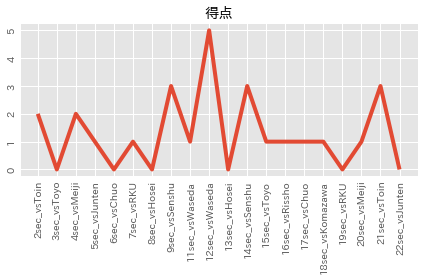

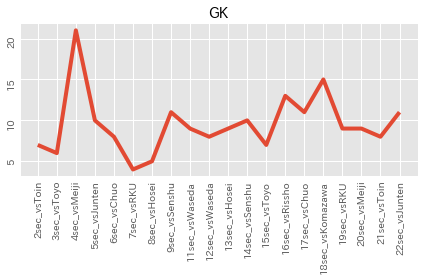

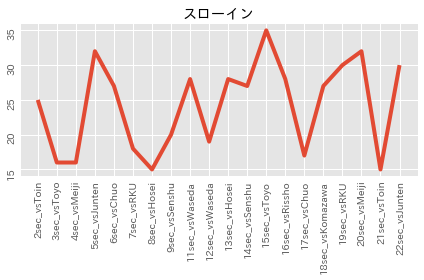

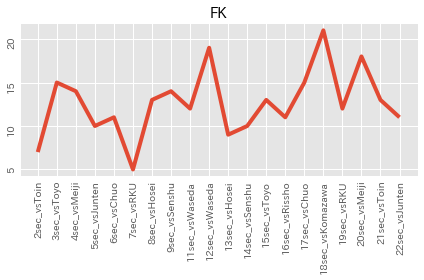

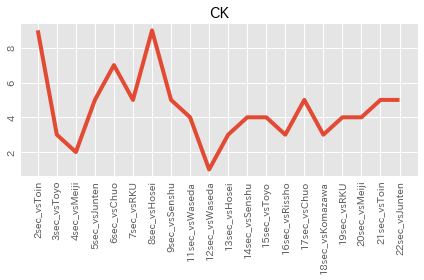

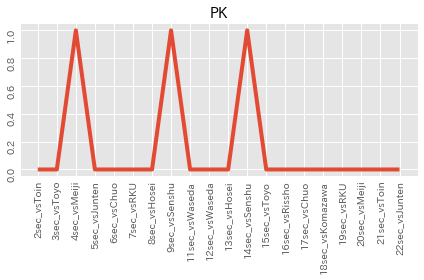

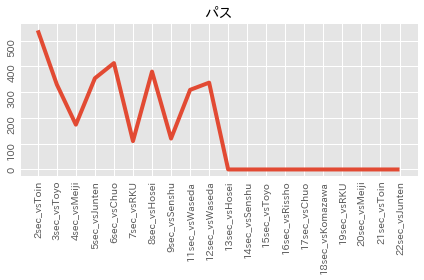

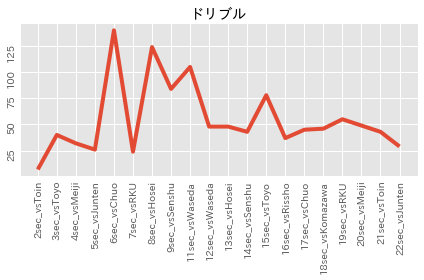

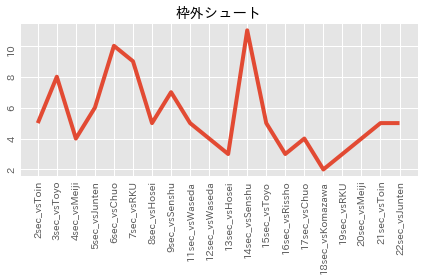

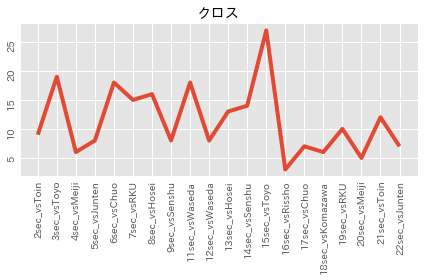

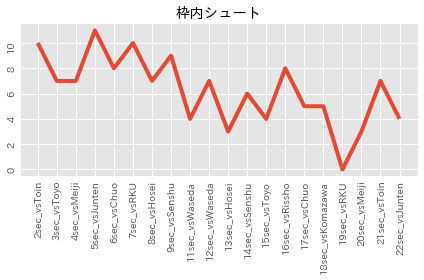

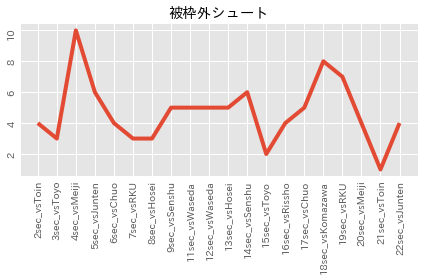

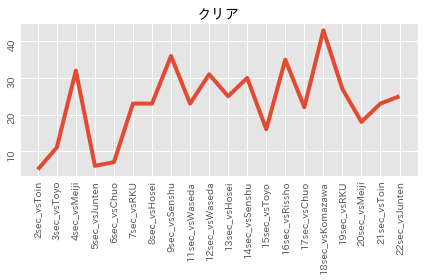

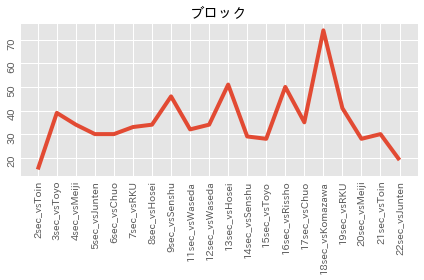

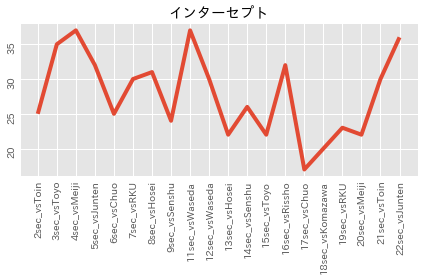

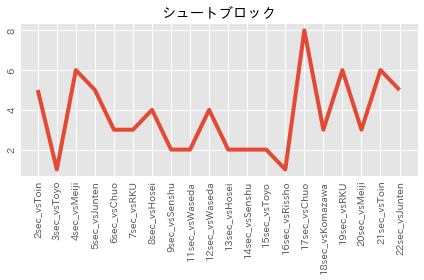

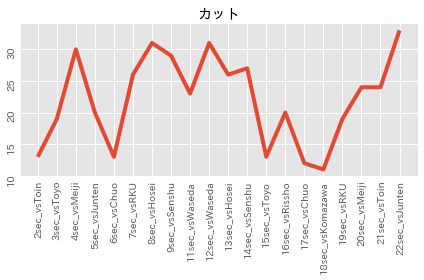

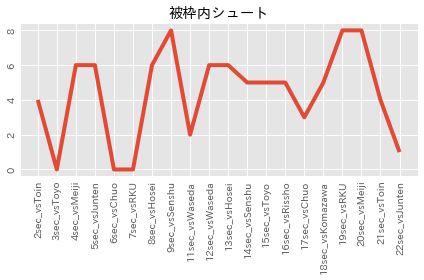

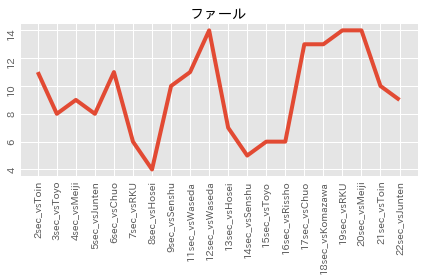

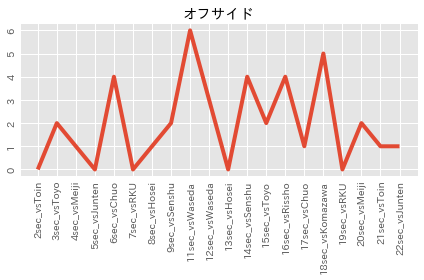

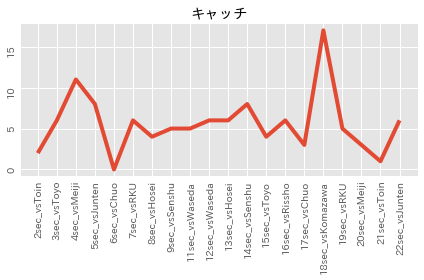

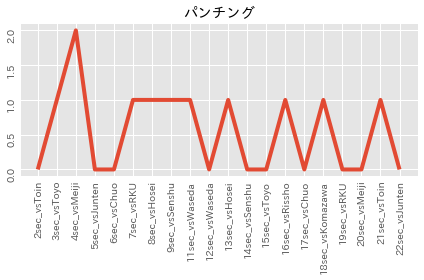

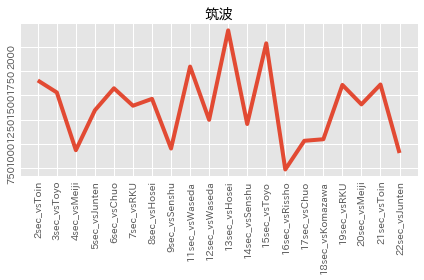

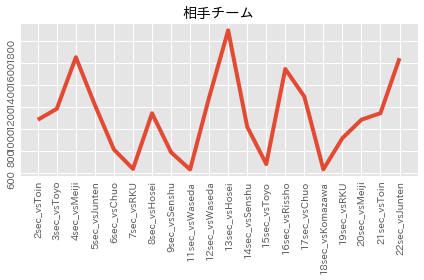

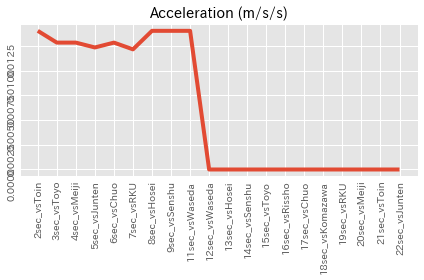

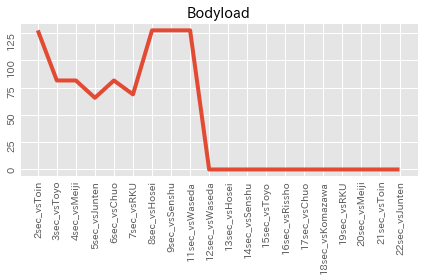

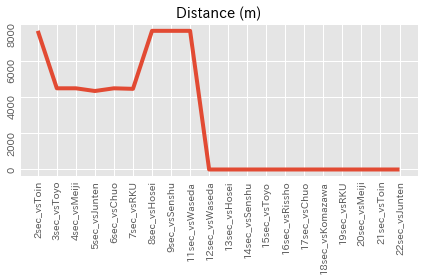

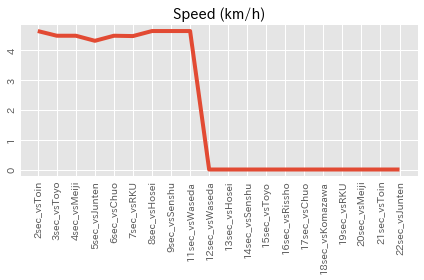

In [174]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import re
plt.style.use('ggplot')

for name, series in df.iterrows():
    plt.plot(series)
    plt.tick_params(rotation=90)
    plt.title(name)
    plt.tight_layout()
    plt.savefig(os.path.join(root, 'dev_code', 'season_report', 'figs',re.sub('[^A-Za-z0-9\u3040-\u309f\u30a0-\u30ff\uff66-\uff9f\u4e00-\u9faf]+', '', name)
+'.png'))
    plt.show()

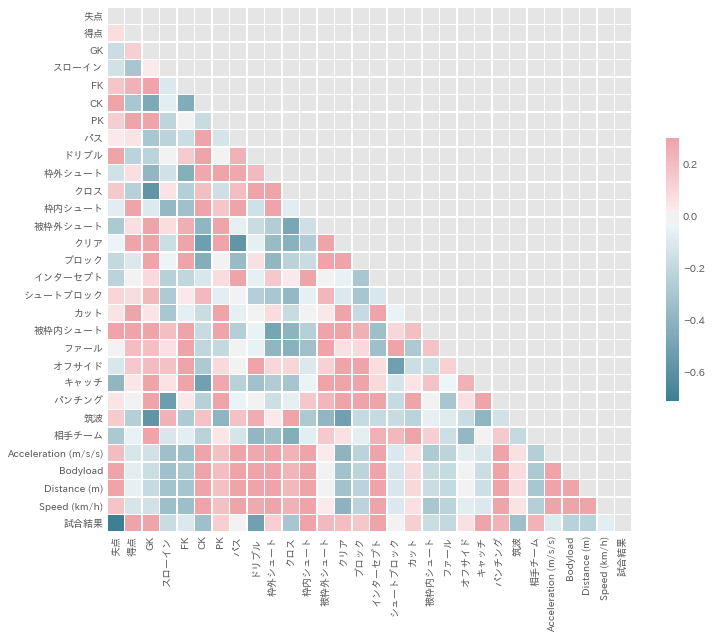

In [176]:
def match_outcome(row):
    if row['得点']>row['失点']:
        return  1
    elif row['得点']<row['失点']:
        return -1
    else:
        return 0
    
pair_plot_df = df.T.reset_index()
pair_plot_df['試合結果'] = pair_plot_df.apply(lambda row: match_outcome(row), axis=1)

corr = pair_plot_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

/home/atom/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/atom/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


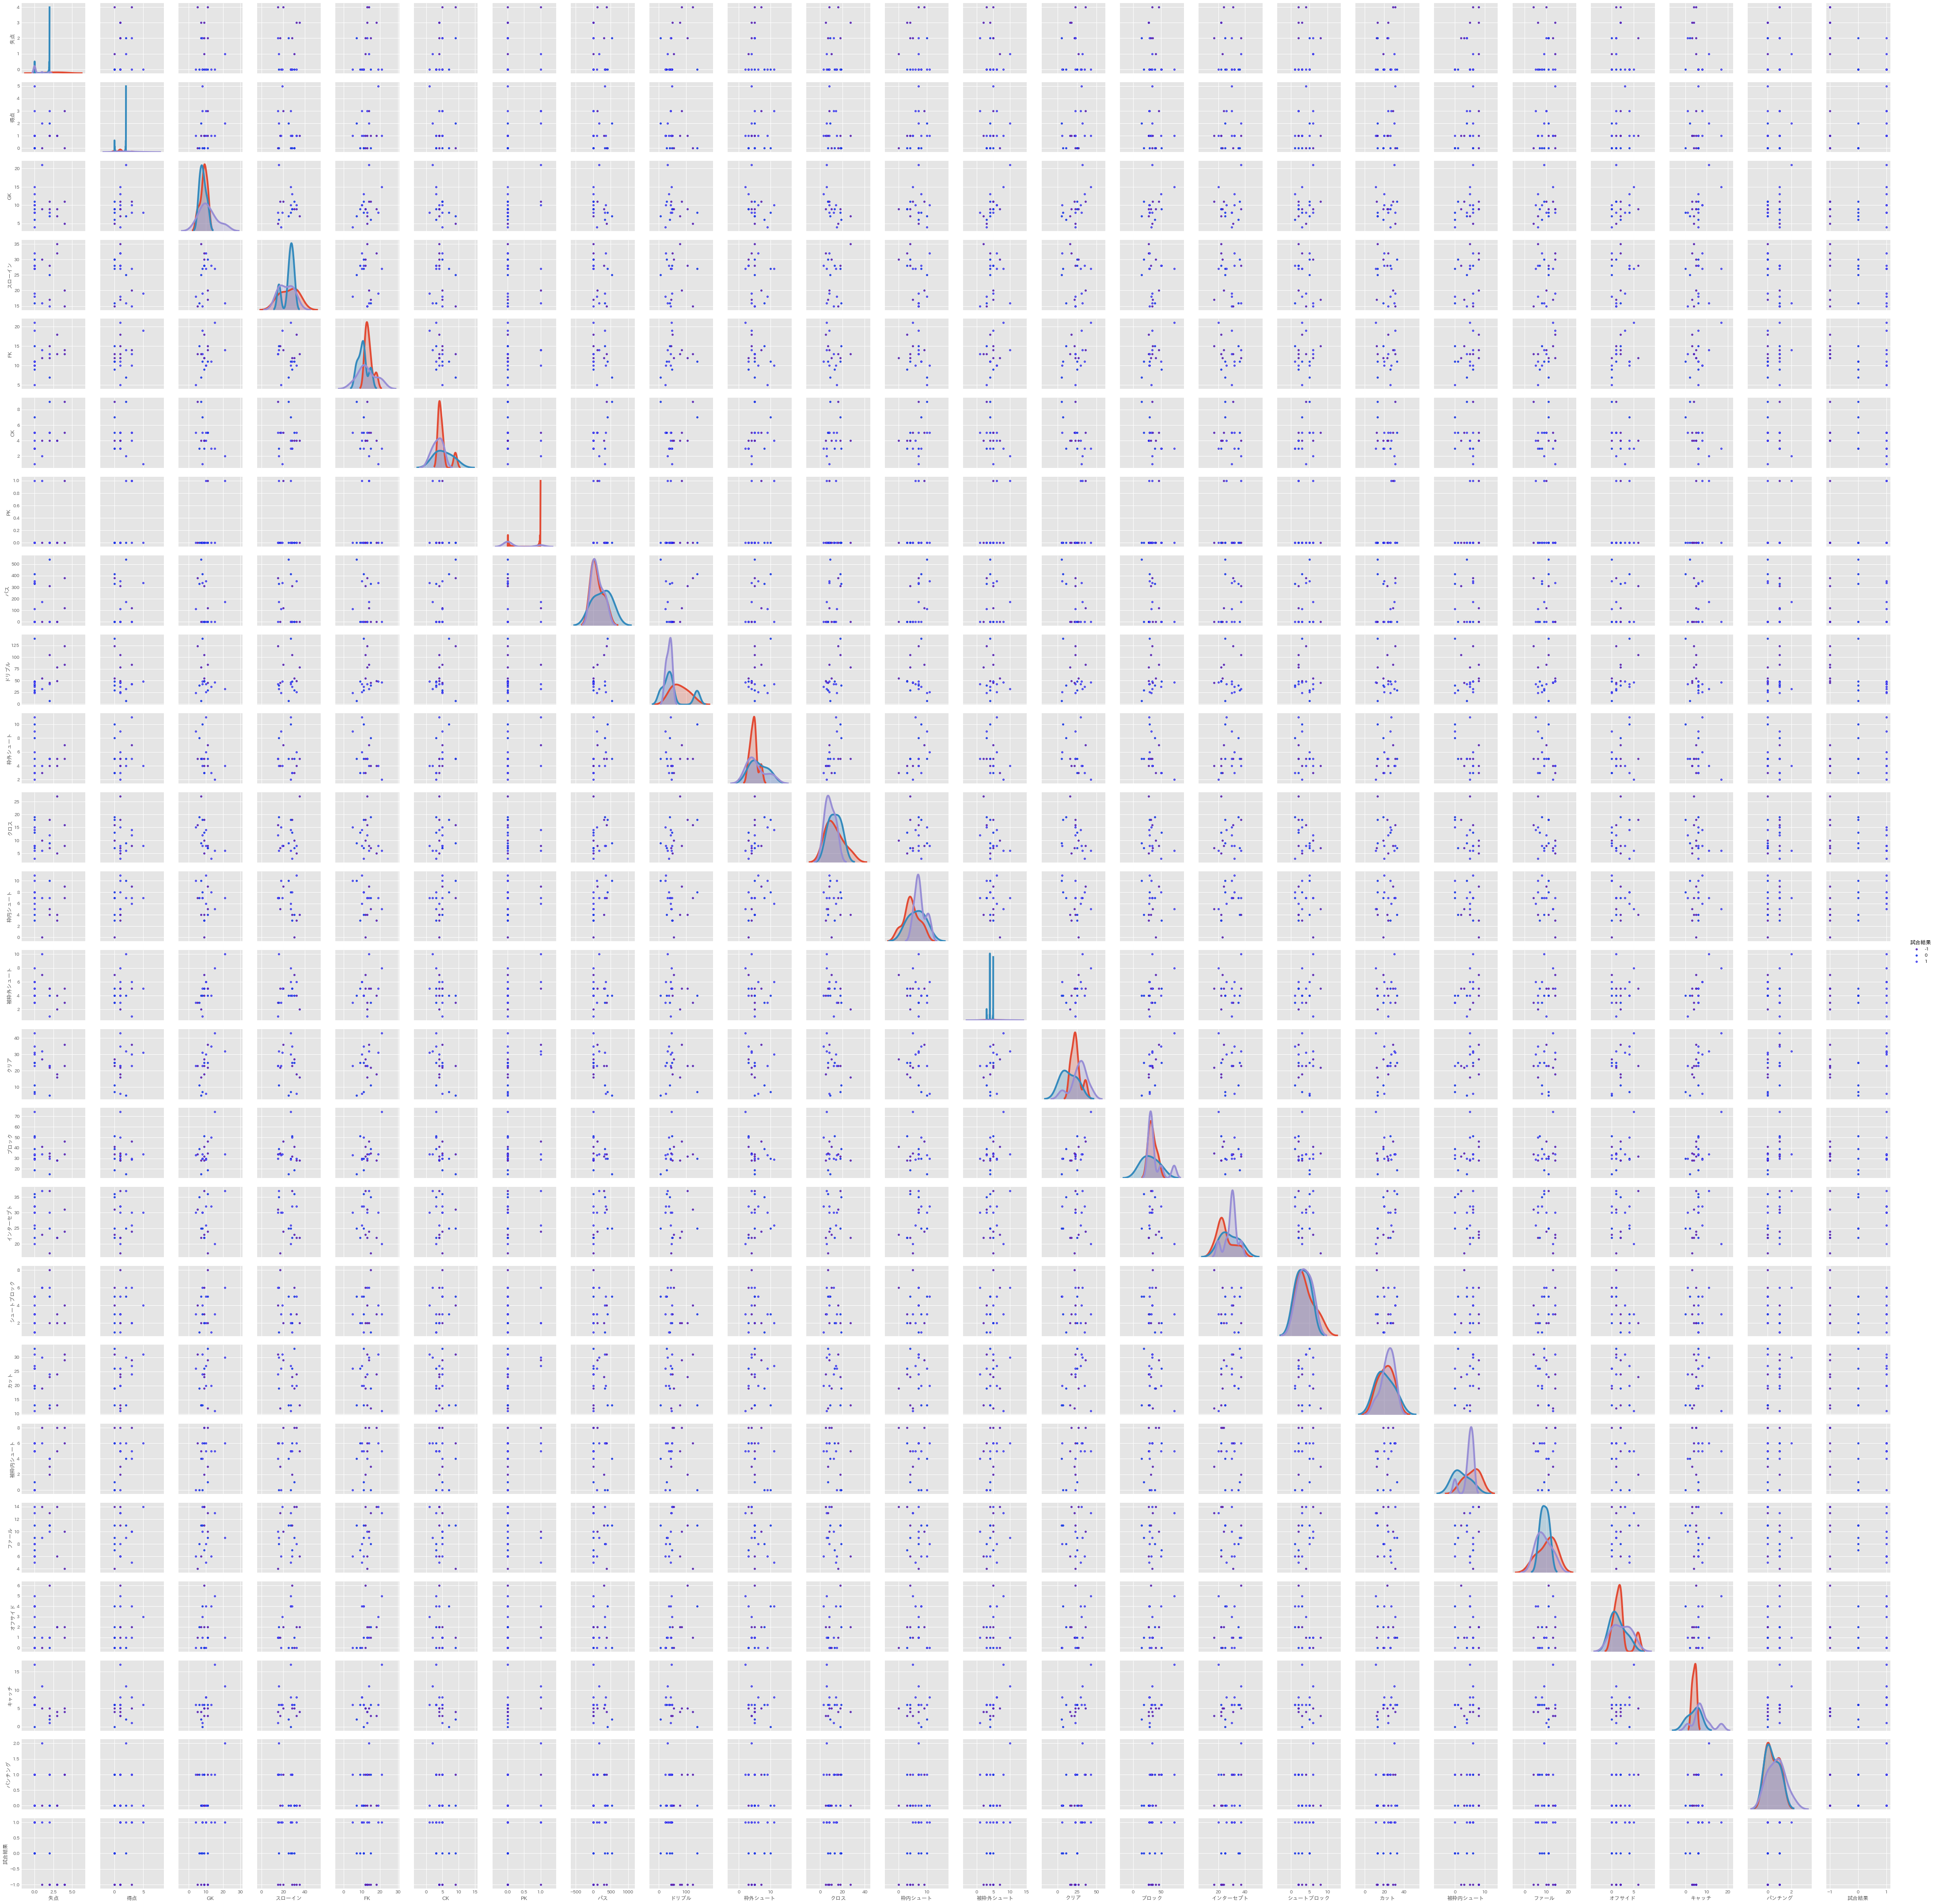

In [177]:
sns.pairplot(pair_plot_df[events[:]+['試合結果']], 
                 hue='試合結果',diag_kind="kde", markers=".",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                 diag_kws=dict(shade=True))